In [11]:
using Formatting
using FileIO
using Distributed
using Plots
#using PyPlot
using JSON
include("./Percolation.jl")
using .Percolation
using UUIDs
using Dates
using SQLite

In [2]:
pyplot()

Plots.PyPlotBackend()

In [30]:
function write_sqlite(r;dbname="perc.sqlite")
    conn = SQLite.DB("perc.sqlite")
    SQLite.query(conn, """INSERT INTO
                         simulations(
                         pc,
                         p1,
                         p2,
                         num_surfaces,
                         start_time,
                         end_time,
                         labeling_neighborhood,
                         dec_round, 
                         deltax,
                         accuracy, 
                         perc_direction,
                         data_dir,
                         user)
    VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)""",
    values=[r["pc"], r["p"][1], r["p"][2], r["numSurf"], 
            string(r["startTime"]), string(r["endTime"]), 
            r["labeling_neighborhood"], r["decRound"],
            r["deltaX"], r["accuracy"], r["perc_direction"], 
            r["data_dir"], r["user"]])
end

write_sqlite (generic function with 1 method)

In [31]:

"""
    ```MainCode(p; numSurf=500, labeling_neighborhood=4, graphs=["histogram", "percgraph"], 
                     decRound=10, deltaX=0.001, accuracy=0.1, perc_direction="vertical")
    ```
p=[p1,p2] which are between 0 and 1.
numSurf: Number of surfaces to test
labeling_neighborhood: 4 nearest neighbor, 8 next nearest neighbor
graphNums: list of graph types to generate
deltaX:
accuracy:
perc_direction:
"""
function MainCode(p; numSurf=500, labeling_neighborhood=4, graphs=["histogram", "percgraph"], 
                     decRound=2, deltaX=0.001, accuracy=0.1, perc_direction="vertical")

    user = ENV["USER"]
    
    ddir = string(uuid4())
    odir = joinpath("data", ddir)
    if ! isdir(odir)
        mkpath(odir)
    end
    areaFracs = []
    PAall =[]
    NPAall =[]
    z = nothing 
    joinpath(odir, "levelsets")
    startTime = now()
    for r=1:1:numSurf
        if r % 10 == 0
            println("iteration # ",r)
        end
        rodir = string("levelsets", format(r, width=4, zeropadding=true ))
        Af, PA, NPA = process_surface(p, joinpath(odir, rodir); 
                         labeling_neighborhood=labeling_neighborhood,
                         accuracy=accuracy,
                         n=20, r=500, levels=100,
                         perc_direction=perc_direction)
        
        areaFracs = append!(areaFracs, Af)
        PAall = append!(PAall, PA)
        NPAall = append!(NPAall, NPA)
    end
    println("Saving intermediate data")

    endtime = now()
    data = Dict("areaFracs"=>areaFracs, 
                   "PAall"=>PAall,
                   "NPAall"=>NPAall)
    open(joinpath(odir, "data.json"), "w") do f
        write(f, JSON.json(data))
    end
    println("Generating graphs")
    if "percgraph" in graphs
        pc = graphPc(odir, deltaX, p, PAall, NPAall, 
                     labeling_neighborhood, numSurf, decRound=decRound)
    else
        pc = nothing
    end
    summary = Dict("UUID"=>odir, 
                   "startTime"=>startTime,
                   "endTime"=>endtime,
                   "p"=>p, 
                   "numSurf"=>numSurf, 
                   "labeling_neighborhood"=>labeling_neighborhood, 
                   "decRound"=>decRound, 
                   "deltaX"=>deltaX, 
                   "accuracy"=>accuracy, 
                   "perc_direction"=>perc_direction,
                   "pc"=>pc,
                   "user"=>user,
                   "data_dir"=>ddir)
    
    open(joinpath(odir, "summary.json"), "w") do f
        write(f, JSON.json(summary))
    end
    write_sqlite(summary)

end

MainCode

iteration # 10
iteration # 20
iteration # 30
iteration # 40
iteration # 50
iteration # 60
iteration # 70
iteration # 80
iteration # 90
iteration # 100
iteration # 110
iteration # 120
iteration # 130
iteration # 140
iteration # 150
iteration # 160
iteration # 170
iteration # 180
iteration # 190
iteration # 200
iteration # 210
iteration # 220
iteration # 230
iteration # 240
iteration # 250
iteration # 260
iteration # 270
iteration # 280
iteration # 290
iteration # 300
iteration # 310
iteration # 320
iteration # 330
iteration # 340
iteration # 350
iteration # 360
iteration # 370
iteration # 380
iteration # 390
iteration # 400
iteration # 410
iteration # 420
iteration # 430
iteration # 440
iteration # 450
iteration # 460
iteration # 470
iteration # 480
iteration # 490
iteration # 500
Saving intermediate data
Generating graphs


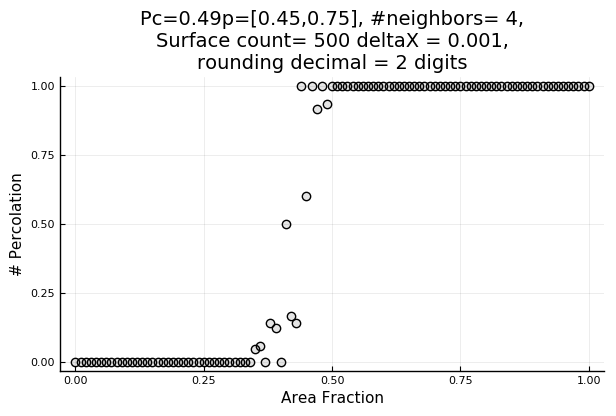

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
┌ Warning: `SQLite.query(db, sql)` will return an `SQLite.Query` object in the future; to materialize a resultset, do `DataFrame(SQLite.query(db, sql))` instead
│   caller = ip:0x0
└ @ Core :-1
┌ Warning: `SQLite.Source(db, sql)` is deprecated in favor of `SQLite.Query(db, sql)` which executes a query and returns a row iterator
│   caller = ip:0x0
└ @ Core :-1


""
""


In [33]:
MainCode([0.45, 0.75], numSurf=500)